<a href="https://colab.research.google.com/github/mancai111/Rett_Mouse/blob/main/Other__Sketch_of_Neuron_Act_%2B_Paw_Displacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/TestCase/heatmap/'

curr = '/content/drive/My Drive/TestCase/preprocessed_data/'

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import dot
from scipy import stats
from numpy.linalg import norm
import matplotlib.pyplot as plt
from collections import defaultdict

os.chdir(abspath_curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/heatmap


In [ ]:
os.chdir(curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/preprocessed_data


In [ ]:
# NC436 Wild Mouse
# Check speed up 60 and down 60, across 14 days

# Setup Parameters

speed_list = ['fup0','fup15','fup30','fup45','fup60',
              'fdown60','fdown45','fdown30','fdown15','fdown0']

# Neurons and PawMovements

In [ ]:
wild_list = ['NC436-M-WT', 'NC443-M-WT']
rett_list = ['NC437-M-NL', 'NC440-M-NL']

days = ['1','2','3','4','5','6','7','8','9','10']

speed_list = ['fup15','fup30','fup45','fup60',
        'fdown60','fdown45','fdown30','fdown15']

l = wild_list+rett_list

In [ ]:
# Choose 3 mice from wild and 3 mice from rett
# use 50 neurons
# for wild and rett, by different speeds, use each frame's neuron activities to predict the velocity of left paw and right paw 


# frame1: neuron readings 1           ;         LX1, LY1, RX1, RY1
# frame2: neuron readings 2           ;         LX2, LY2, RX2, RY2
# frame3: neuron readings 3           ;         LX3, LY3, RX3, RY3
# frame4: neuron readings 4           ;         LX4, LY4, RX4, RY4

# frame1 velocity: 0
# frame2 velocity = frame 3 LX/LY/RX/RY - frame 1 LX/LY/RX/RY -> neurons to this velocity
# frame3 velocity = frame 4 LX/LY/RX/RY - frame 2 LX/LY/RX/RY -> neurons to this velocity


days = ['1','2','3','4','5','6','7','8','9','10']

speed_list = ['fup15','fup30','fup45','fup60',
        'fdown60','fdown45','fdown30','fdown15']

l = wild_list+rett_list


for mouse in l:

  whole = pd.DataFrame()

  for i in days:

    basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=i) ###Error???
    PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

    p = pd.DataFrame()

    for speed in speed_list:
    
      sample_paw = pd.read_excel(PN_WB, speed+' pawMovement').iloc[:,1:5]
      sample_neuron = pd.read_excel(PN_WB, speed+' neuronActivity').iloc[:,1:51]
      sample = pd.concat([sample_neuron, sample_paw], axis=1)
      sample['speed'] = speed

      p = pd.concat([p, sample])
  
    p['day'] = int(i)
    whole = pd.concat([whole, p])

  file_name = '1_'+mouse+'.csv'
  whole.to_csv(file_name)

    

In [ ]:
# Get numbers of neurons for these mice

days = ['1','2','3','4','5','6','7','8','9','10']

speed_list = ['fup15','fup30','fup45','fup60',
        'fdown60','fdown45','fdown30','fdown15']

l = wild_list+rett_list

mouse = 'NC436-M-WT'


for i in days:

  basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=i)
  PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

  for speed in speed_list:
    
    sample_neuron = pd.read_excel(PN_WB, speed+' neuronActivity').iloc[:,1:]
    print(len(sample_neuron.columns))
    break

157
245
269
251
233
258
294
308
307
303


In [ ]:
days = ['1','2','3','4','5','6','7','8','9','10']

speed_list = ['fup15','fup30','fup45','fup60',
        'fdown60','fdown45','fdown30','fdown15']

l = wild_list+rett_list

mouse = 'NC786-M-WT'


for i in days:

  basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=i)
  PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

  for speed in speed_list:
    
    sample_neuron = pd.read_excel(PN_WB, speed+' neuronActivity').iloc[:,1:]
    print(len(sample_neuron.columns))
    break

35
6
4
17
20
18
23
23
32
15


In [ ]:
days = ['1','2','3','4','5','6','7','8','9','10']

speed_list = ['fup15','fup30','fup45','fup60',
        'fdown60','fdown45','fdown30','fdown15']

l = wild_list+rett_list

mouse = 'NC437-M-NL'


for i in days:

  basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=i)
  PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

  for speed in speed_list:
    
    sample_neuron = pd.read_excel(PN_WB, speed+' neuronActivity').iloc[:,1:]
    print(len(sample_neuron.columns))
    break

218
305
226
246
216
255
297
311
237
312


In [ ]:
days = ['1','2','3','4','5','6','7','8','9','10']

speed_list = ['fup15','fup30','fup45','fup60',
        'fdown60','fdown45','fdown30','fdown15']

l = wild_list+rett_list

mouse = 'NC773-M-NL'


for i in days:

  basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=i)
  PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

  for speed in speed_list:
    
    sample_neuron = pd.read_excel(PN_WB, speed+' neuronActivity').iloc[:,1:]
    print(len(sample_neuron.columns))
    break

140
246
246
292
285
237
246
163
222
201


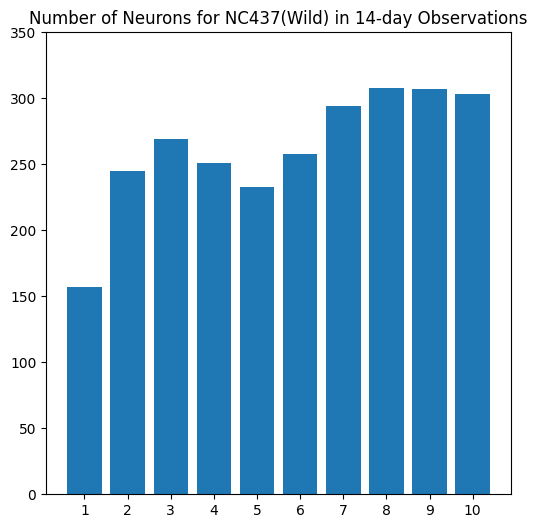

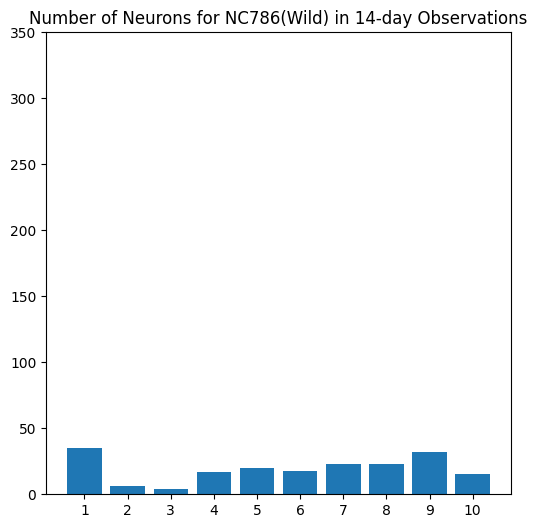

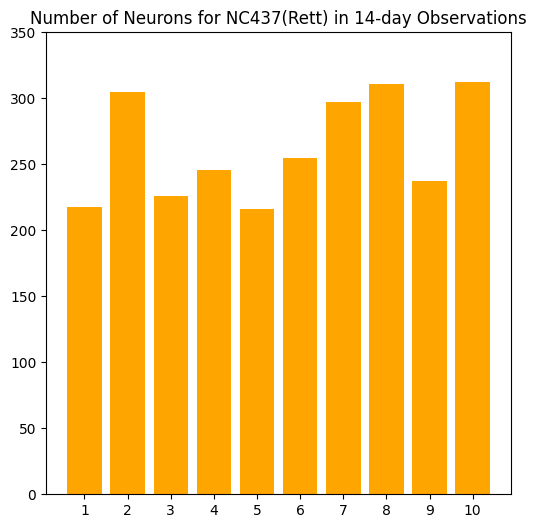

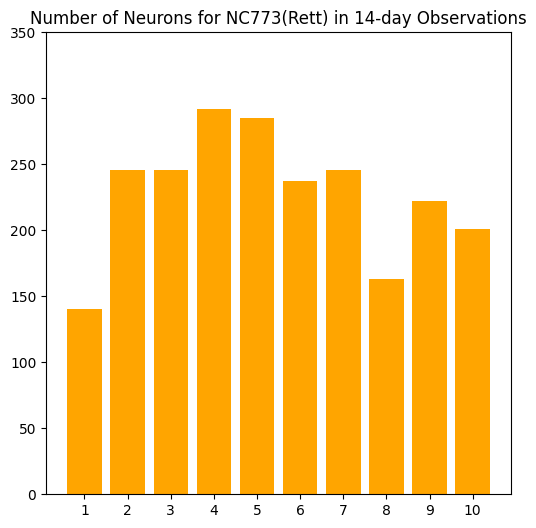

In [ ]:
neurons_436 = [157, 245, 269, 251, 233, 258, 294, 308, 307, 303]
neurons_786 = [35, 6, 4, 17, 20, 18, 23, 23, 32, 15]
neurons_437 = [218, 305, 226, 246, 216, 255, 297, 311, 237, 312]
neurons_773 = [140, 246, 246, 292, 285, 237, 246, 163, 222, 201]

df=pd.DataFrame({'436':neurons_436, '786':neurons_786, '437':neurons_437, '773':neurons_773})
days = ['1','2','3','4','5','6','7','8','9','10']



fig = plt.figure(figsize =(6,6))
plt.bar(days,df['436'])
plt.title('Number of Neurons for NC437(Wild) in 14-day Observations')
plt.ylim(0,350)
plt.show()

fig = plt.figure(figsize =(6,6))
plt.bar(days,df['786'])
plt.title('Number of Neurons for NC786(Wild) in 14-day Observations')
plt.ylim(0,350)
plt.show()

fig = plt.figure(figsize =(6,6))
plt.bar(days,df['437'], color='orange')
plt.title('Number of Neurons for NC437(Rett) in 14-day Observations')
plt.ylim(0,350)
plt.show()

fig = plt.figure(figsize =(6,6))
plt.bar(days,df['773'], color='orange')
plt.title('Number of Neurons for NC773(Rett) in 14-day Observations')
plt.ylim(0,350)
plt.show()

In [ ]:
# got the each mouse's dfs which contain neuron activities and corresponding paw velocities in all experimental days, dfs distinguished by 15, 30, 45, 60 up down

for mouse in l:
  filename = '1_'+mouse+'.csv'

  m = pd.read_csv(filename).drop('Unnamed: 0',axis=1)


  for speed in speed_list:

    dataframe_with_velocity_at_speed = pd.DataFrame()

    for i in range(1,11):

      temp = m[ (m['day'] == i) & (m['speed'] == speed)]

      temp = temp.reset_index(drop=True)
  

      for ii in ['Lx', 'Rx', 'Ly', 'Ry']:
        difference = temp[ii].diff(periods=2)
        difference = difference.reset_index(drop=True)
        difference = difference.fillna(0)
    
        difference = difference.drop(0)
        difference = difference.reset_index(drop=True)
        difference.loc[len(difference)] = 0

        temp[ii+'_velocity'] = difference

      temp = temp[1:-1].reset_index(drop=True)

      dataframe_with_velocity_at_speed = pd.concat([dataframe_with_velocity_at_speed, temp])

    dataframe_with_velocity_at_speed.to_csv('1_'+mouse+'_'+speed+'.csv', index=False)

# wild and rett as whole

In [ ]:
#combine all wild mice data, and all rett mice data by speeds

#up15

#up30

#up45

#up60

#down15

#down30

#down45

#down60
wild_list = ['NC436-M-WT', 'NC443-M-WT']
rett_list = ['NC437-M-NL', 'NC440-M-NL']

def merge_data(wild_or_rett,speed):
  merge_df = pd.DataFrame()

  for i in wild_or_rett:
    filename = '1_'+i+'_'+speed+'.csv'
    d = pd.read_csv(filename)
    merge_df = pd.concat([merge_df, d])
  merge_df = merge_df.reset_index(drop=True)
  return merge_df


In [ ]:
#up15

# Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
#        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
#        '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
#        '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
#        '49', 'Lx', 'Ly', 'Rx', 'Ry', 'speed', 'day', 'Lx_velocity',
#        'Rx_velocity', 'Ly_velocity', 'Ry_velocity'],
#       dtype='object')

neuron_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49']

In [ ]:
#No selection feature

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

def lin_with_and_without_feature_selection(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  reg = LinearRegression().fit(X_train, y_train)
  score_no_selection = reg.score(X_test, y_test)

  select = SelectKBest(score_func=f_regression, k=10).fit(X,y)
  z = select.fit(X,y)
  filter = z.get_support()
  features = X.columns
  print(features[filter])

  # X_train, X_test, y_train, y_test = train_test_split(X[features[filter]], y, test_size=0.3, random_state=42)
  # reg = LinearRegression().fit(X_train, y_train)
  # score_with_selection = reg.score(X_test, y_test)

  return score_no_selection

In [ ]:
wild_up15 = merge_data(wild_list, 'fup15')
rett_up15 = merge_data(rett_list, 'fup15')

In [ ]:
wild_up30 = merge_data(wild_list, 'fup30')
rett_up30 = merge_data(rett_list, 'fup30')

In [ ]:
wild_up45 = merge_data(wild_list, 'fup45')
rett_up45 = merge_data(rett_list, 'fup45')

In [ ]:
wild_up60 = merge_data(wild_list, 'fup60')
rett_up60 = merge_data(rett_list, 'fup60')

In [ ]:
# down....

## Individual mouse

In [ ]:
# NC436 Fup15

filename = '1_'+'NC436-M-WT'+'_'+'fup15'+'.csv'
d = pd.read_csv(filename)


X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['3', '6', '7', '10', '12', '19', '21', '39', '40', '42'], dtype='object')


-0.018362165102244754

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Fit regression model

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

# Predict
y_2 = regr_2.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

Mean Absolute Error: 16.97077948509958
Mean Squared Error: 573.9728092656146
Root Mean Squared Error: 23.957729635038763


In [ ]:
filename = '1_'+'NC436-M-WT'+'_'+'fup30'+'.csv'
d = pd.read_csv(filename)


X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['10', '12', '14', '15', '18', '26', '29', '32', '36', '47'], dtype='object')


-0.01720130374137674

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Fit regression model

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

# Predict
y_2 = regr_2.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

Mean Absolute Error: 18.57990542772689
Mean Squared Error: 622.9798524755086
Root Mean Squared Error: 24.959564348672206


In [ ]:
filename = '1_'+'NC436-M-WT'+'_'+'fup45'+'.csv'
d = pd.read_csv(filename)


X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['3', '5', '6', '13', '21', '26', '31', '39', '45', '46'], dtype='object')


-0.01657700651935423

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Fit regression model

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

# Predict
y_2 = regr_2.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

Mean Absolute Error: 17.307832458512905
Mean Squared Error: 497.76141144571534
Root Mean Squared Error: 22.310567259612995


In [ ]:
filename = '1_'+'NC436-M-WT'+'_'+'fup60'+'.csv'
d = pd.read_csv(filename)


X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['3', '11', '14', '22', '24', '32', '35', '37', '45', '47'], dtype='object')


-0.011004616110695142

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Fit regression model

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

# Predict
y_2 = regr_2.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

Mean Absolute Error: 17.145603528445864
Mean Squared Error: 488.2979619646012
Root Mean Squared Error: 22.097465057435915


NC437 NL

In [ ]:
# NC437 Fup15

filename = '1_'+'NC437-M-NL'+'_'+'fup15'+'.csv'
d = pd.read_csv(filename)

X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['0', '3', '5', '16', '29', '33', '40', '41', '42', '48'], dtype='object')


-0.012709374101552928

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

# Predict
y_2 = regr_2.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

#df=pd.DataFrame({'Actual':y_test, 'Predicted':y_2})
#df

Mean Absolute Error: 10.37517646579547
Mean Squared Error: 212.80205940902985
Root Mean Squared Error: 14.587736610215783


In [ ]:
filename = '1_'+'NC437-M-NL'+'_'+'fup30'+'.csv'
d = pd.read_csv(filename)

X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['12', '14', '16', '19', '20', '39', '40', '41', '46', '49'], dtype='object')


-0.013408199100187312

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

# Predict
y_2 = regr_2.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

#df=pd.DataFrame({'Actual':y_test, 'Predicted':y_2})
#df

Mean Absolute Error: 12.170075039541755
Mean Squared Error: 236.97799866531824
Root Mean Squared Error: 15.394089731624868


In [ ]:
filename = '1_'+'NC437-M-NL'+'_'+'fup45'+'.csv'
d = pd.read_csv(filename)

X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['2', '3', '5', '11', '16', '19', '24', '26', '38', '44'], dtype='object')


-0.015083280183556536

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

# Predict
y_2 = regr_2.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

#df=pd.DataFrame({'Actual':y_test, 'Predicted':y_2})
#df

Mean Absolute Error: 14.234258137508327
Mean Squared Error: 328.5515603860662
Root Mean Squared Error: 18.12599129388697


In [ ]:
filename = '1_'+'NC437-M-NL'+'_'+'fup60'+'.csv'
d = pd.read_csv(filename)

X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['5', '8', '10', '16', '22', '29', '35', '38', '43', '47'], dtype='object')


-0.016697853944619867

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

# Predict
y_2 = regr_2.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_2)))

#df=pd.DataFrame({'Actual':y_test, 'Predicted':y_2})
#df

Mean Absolute Error: 15.749523829130617
Mean Squared Error: 410.6396470894757
Root Mean Squared Error: 20.26424553467204


above is actual right data

In [ ]:
filename = '1_'+'NC436-M-WT'+'_'+'fup15'+'_test.csv'
d = pd.read_csv(filename)


X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['2', '3', '6', '8', '13', '23', '27', '39', '48', '49'], dtype='object')


0.013664208856837168

In [ ]:
filename = '1_'+'NC436-M-WT'+'_'+'fup30'+'_test.csv'
d = pd.read_csv(filename)

X_data = d[neuron_features]
y_data = d['Lx_velocity']
lin_with_and_without_feature_selection(X_data, y_data)

Index(['5', '7', '8', '12', '22', '25', '26', '27', '33', '45'], dtype='object')


0.0020908499342047193

feature selection not important because need more neurons, but neuron activity recording is the obstacle

In [ ]:
get a barplot counting the neurons for the mice